#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [1]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/Users/krystofpipal/MSP/.venv/bin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/Library/Frameworks/Python.framework/Versions/3.11/bin:/Library/Frameworks/Python.framework/Versions/3.10/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/opt/X11/bin


In [2]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [ ]:
import os

# Ensure directory exists
os.makedirs("LHCb_Data", exist_ok=True)

# Move file if it exists
if os.path.exists("B2HHH_MagnetDown.root"):
    os.rename("B2HHH_MagnetDown.root", "LHCb_Data/B2HHH_MagnetDown.root")
else:
    print("File B2HHH_MagnetDown.root not found.")


mkdir: LHCb_Data: File exists


In [ ]:
import uproot, awkward, numpy as np

file_path = "LHCb_Data/B2HHH_MagnetDown.root"

if os.path.exists(file_path):
    f = uproot.open(file_path)
    print(f.keys())
else:
    print(f"Error: File {file_path} not found.")
f.keys()

['DecayTree;1']

In [71]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [ ]:
def safe_load(var):
    try:
        return f[f"DecayTree/{var}"].array()
    except KeyError:
        print(f"Error: {var} not found in DecayTree")
        return None

data_x = safe_load("H1_PX")
data_2 = safe_load("H2_PX")
data_3 = safe_load("H3_PX")





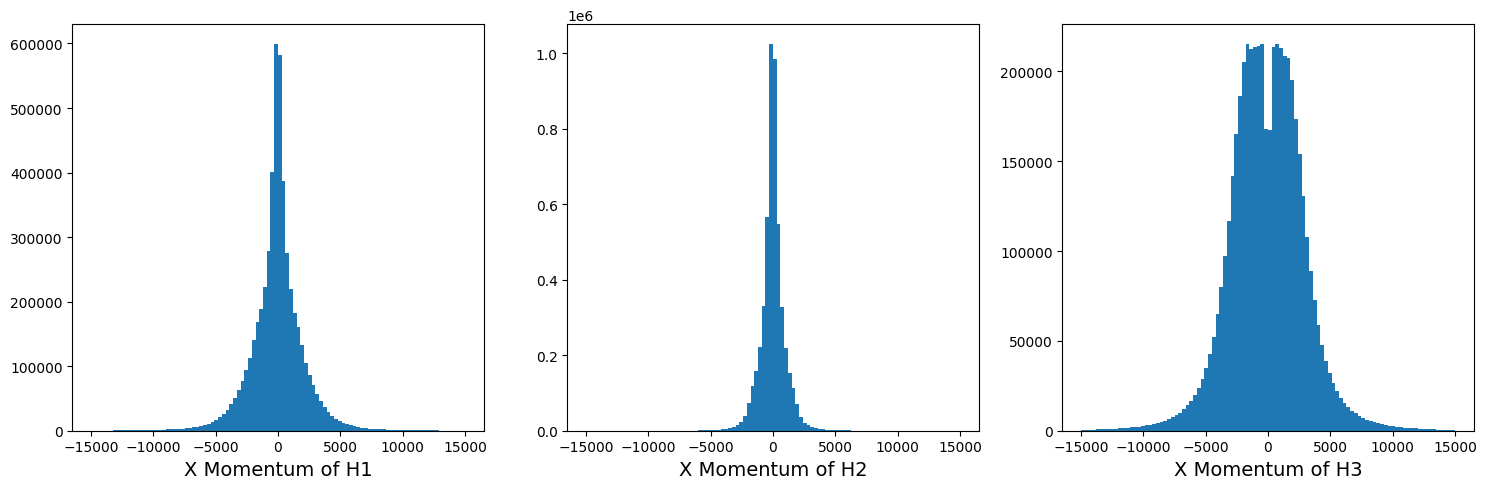

In [ ]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, data, label in zip(axes, [data_x, data_2, data_3], ["H1", "H2", "H3"]):
    if data is not None:  #prevents errors if any dataset is missing
        ax.hist(data, bins=100, range=(-15000, 15000))
        ax.set_xlabel(f"X Momentum of {label}", fontsize=14)

plt.tight_layout()
plt.show()



<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

H1 Total Momentum:
 [5.18e+04, 3.26e+05, 9.08e+04, 8.69e+04, ..., 3.73e+04, 3.59e+04, 5.21e+03]
H2 Total Momentum:
 [1.77e+04, 5.33e+03, 1.79e+04, 2.03e+04, ..., 6.35e+03, 7.74e+03, 2.21e+04]
H3 Total Momentum:
 [1.06e+05, 8.77e+04, 8.56e+04, 1.47e+04, ..., 1.07e+04, 1.14e+05, 1.15e+05]


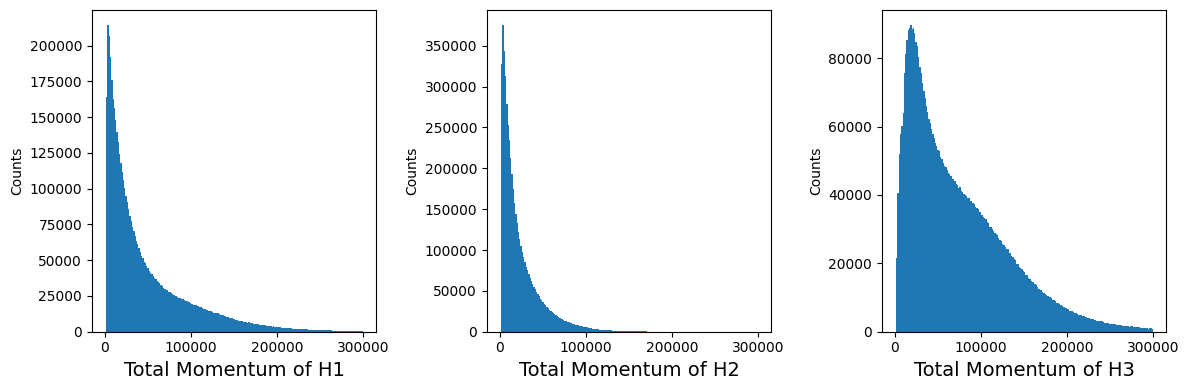

In [ ]:
#access the DecayTree
events = f["DecayTree"]

#define particle names
particles = ["H1", "H2", "H3"]

#load all momentum components into a dictionary
momentum = {p: {axis: events[f"{p}_P{axis}"].array() for axis in "XYZ"} for p in particles}

#compute total momentum for each particle
total_momentum = {p: np.sqrt(sum(momentum[p][axis]**2 for axis in "XYZ")) for p in particles}

for p in particles:
    print(f"{p} Total Momentum:\n", total_momentum[p])

plt.figure(figsize=(12, 4))
for i, p in enumerate(particles, 1):
    plt.subplot(1, 3, i)
    plt.hist(total_momentum[p], bins=200, range=(0, 300000))
    plt.xlabel(f"Total Momentum of {p}", fontsize=14)
    plt.ylabel("Counts")
plt.tight_layout()
plt.show()



In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

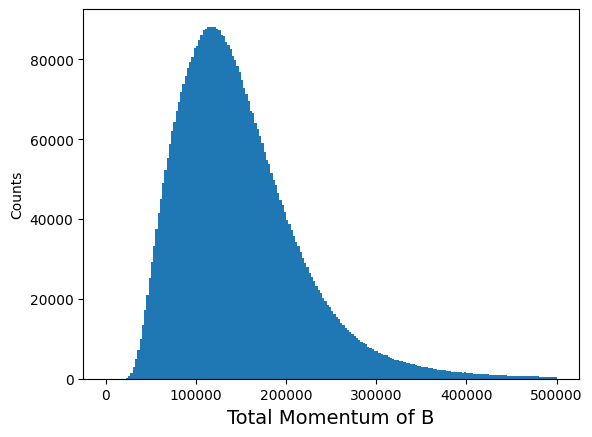

In [ ]:
#compute total momentum of the mother particle (B)
B_Ptot = np.sqrt(
    sum((momentum["H1"][axis] + momentum["H2"][axis] + momentum["H3"][axis])**2 for axis in "XYZ")
)

plt.figure()
plt.hist(B_Ptot, bins=200, range=(0, 500000))
plt.xlabel("Total Momentum of B", fontsize=14)
plt.ylabel("Counts")
plt.show()


So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [ ]:
import awkward as ak

branches_dict = ak.to_list(events.arrays())

event_idx = 45
print(f"Event number #{event_idx}")
print("-------------------")
for branch, value in branches_dict[event_idx].items():
    print(f"{branch}: {value}")


Event number #45
-------------------
B_FlightDistance: 257.00205776946603
B_VertexChi2: 1.865567179221614
H1_PX: 420.3413896413646
H1_PY: -110.66276079201207
H1_PZ: 5883.766388082404
H1_ProbK: 0.012183159589767456
H1_ProbPi: 0.8191394209861755
H1_Charge: -1
H1_IPChi2: 27121.53690741779
H1_isMuon: 1
H2_PX: -985.6367588987478
H2_PY: 630.9893539299605
H2_PZ: 35342.13861801284
H2_ProbK: 0.6670113801956177
H2_ProbPi: 0.04563945531845093
H2_Charge: 1
H2_IPChi2: 13712.438218214942
H2_isMuon: 0
H3_PX: -6242.300384410311
H3_PY: -862.2130979651508
H3_PZ: 277275.49225626234
H3_ProbK: 0.07501816749572754
H3_ProbPi: 0.428352952003479
H3_Charge: 1
H3_IPChi2: 1026.12298434195
H3_isMuon: 0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

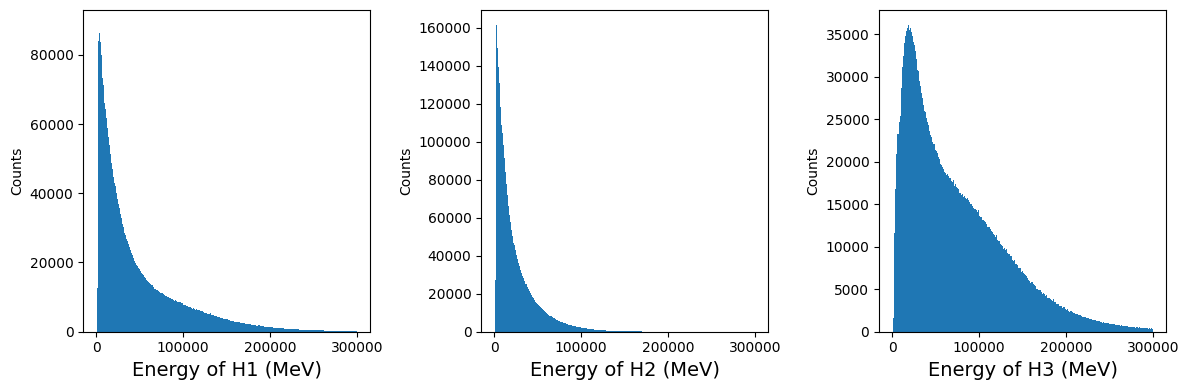

In [ ]:
m_K = 493.7  # Kaon mass in MeV

#compute energy for each daughter
E = {p: np.sqrt(total_momentum[p]**2 + m_K**2) for p in ["H1", "H2", "H3"]}

plt.figure(figsize=(12, 4))
for i, (p, energy) in enumerate(E.items(), 1):
    plt.subplot(1, 3, i)
    plt.hist(energy, bins=500, range=(0, 300000))
    plt.xlabel(f"Energy of {p} (MeV)", fontsize=14)
    plt.ylabel("Counts")
plt.tight_layout()
plt.show()


We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

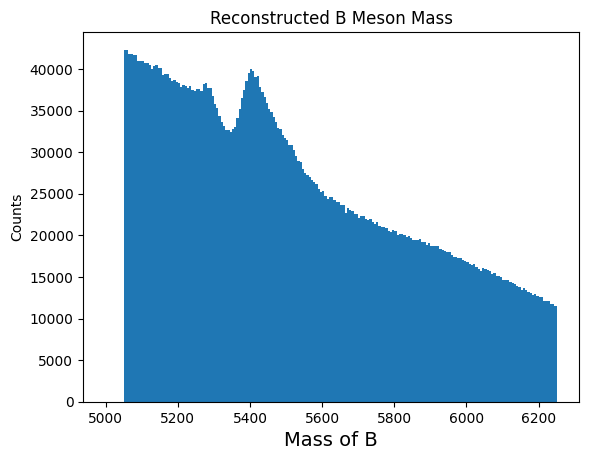

In [ ]:
#compute energy and mass of the B meson
E_B = sum(E.values())
m_B = np.sqrt(E_B**2 - B_Ptot**2)


plt.figure()
plt.hist(m_B, bins=200, range=(5000, 6250))
plt.xlabel("Mass of B", fontsize=14)
plt.ylabel("Counts")
plt.title("Reconstructed B Meson Mass")
plt.show()


We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

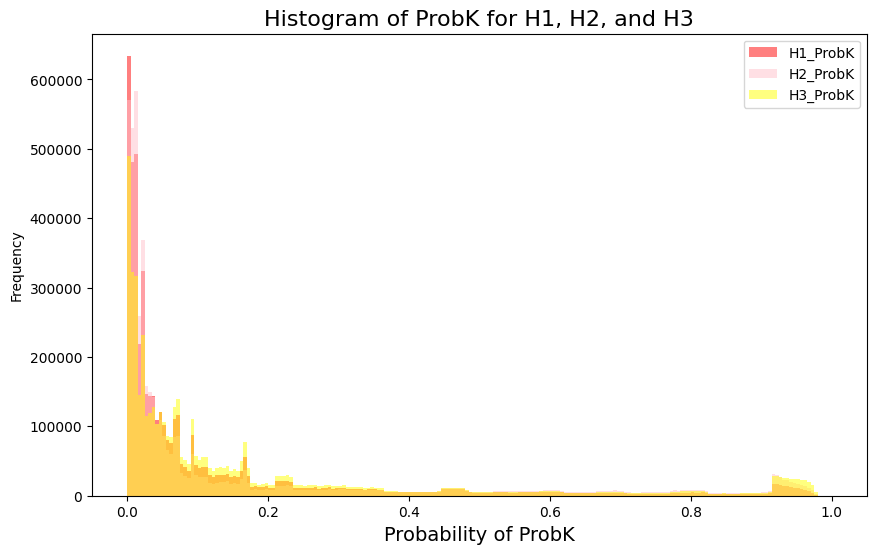

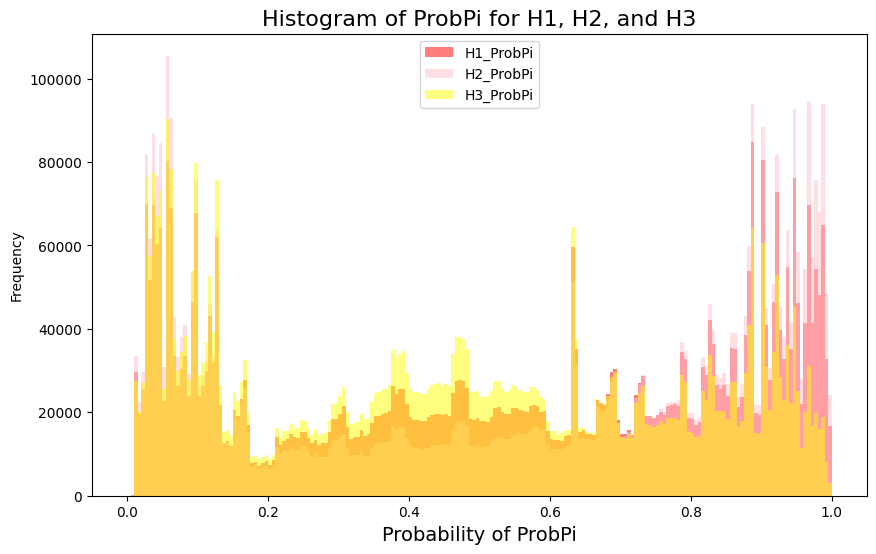

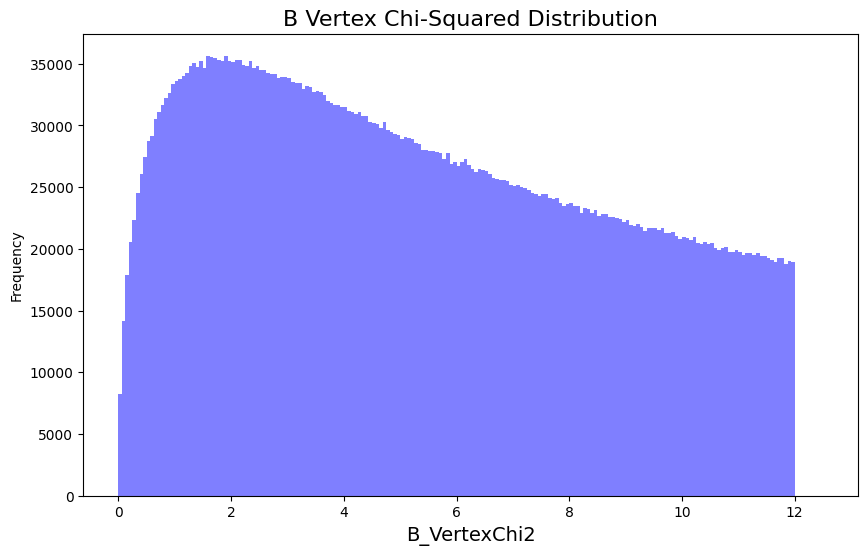

In [ ]:
#load ProbK and ProbPi values
prob_vars = ["ProbK", "ProbPi"]
prob_data = {var: {p: events[f"{p}_{var}"].array() for p in ["H1", "H2", "H3"]} for var in prob_vars}

colors = ["red", "pink", "yellow"]

for var in prob_vars:
    plt.figure(figsize=(10, 6))
    for p, color in zip(["H1", "H2", "H3"], colors):
        plt.hist(prob_data[var][p], bins=200, range=(0, 1), color=color, alpha=0.5, label=f"{p}_{var}")
    plt.xlabel(f"{var}", fontsize=14)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {var} for H1, H2, and H3", fontsize=16)
    plt.legend()
    plt.show()

B_VertexChi2 = events["B_VertexChi2"].array()
plt.figure(figsize=(10, 6))
plt.hist(B_VertexChi2, bins=200, range=(0, 12.5), color="blue", alpha=0.5)
plt.xlabel("B_VertexChi2", fontsize=14)
plt.ylabel("Frequency")
plt.title("B Vertex Chi-Squared Distribution", fontsize=16)
plt.show()


Using these plots, we can now think about making a preselection. This has some format like the below:

In [ ]:
#extract all variables from the decay tree as an Awkward Array
branches = events.arrays()
#define selection criteria
selection = (
    (branches["H1_ProbK"] > 0.2) &
    (branches["H2_ProbK"] > 0.2) &
    (branches["H3_ProbK"] > 0.2) &
    (branches["H1_isMuon"] != 1) &
    (branches["H2_isMuon"] != 1) &
    (branches["H3_isMuon"] != 1) &
    (branches["B_VertexChi2"] > 0) &
    (branches["B_VertexChi2"] < 5)
)


Number of selected events: 34066


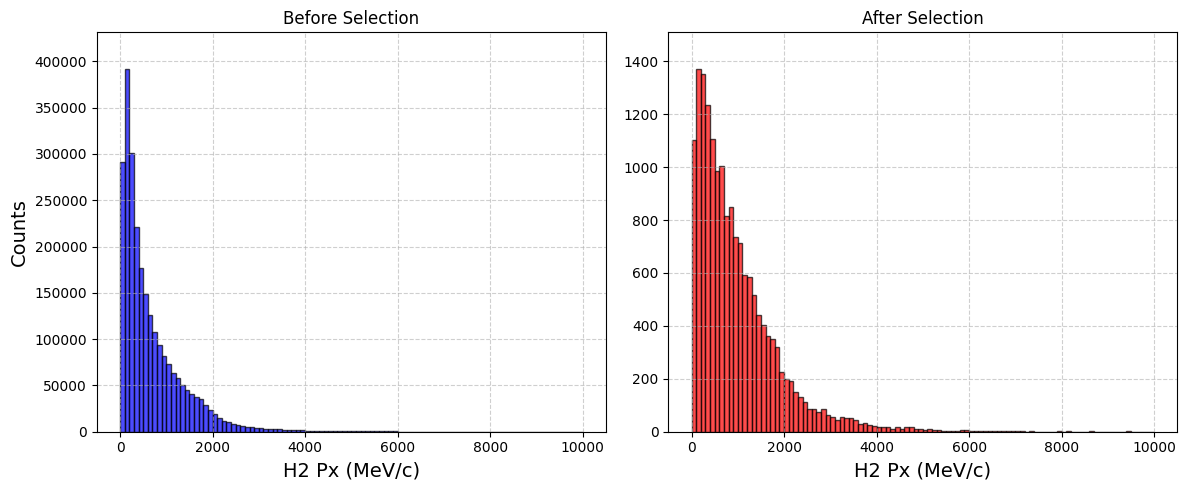

In [ ]:
#apply selection
CutTree_H2_PX = branches['H2_PX'][selection]

print(f"Number of selected events: {len(CutTree_H2_PX)}")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(branches['H2_PX'], bins=100, range=(0, 10000), color='blue', alpha=0.7, edgecolor='black')
ax[0].set_xlabel("H2 Px (MeV/c)", fontsize=14)
ax[0].set_ylabel("Counts", fontsize=14)
ax[0].set_title("Before Selection")
ax[0].grid(True, linestyle="--", alpha=0.6)

ax[1].hist(CutTree_H2_PX, bins=100, range=(0, 10000), color='red', alpha=0.7, edgecolor='black')
ax[1].set_xlabel("H2 Px (MeV/c)", fontsize=14)
ax[1].set_title("After Selection")
ax[1].grid(True, linestyle="--", alpha=0.6)

ax[0].set_ylim(0, max(np.histogram(branches['H2_PX'], bins=100, range=(0, 10000))[0]) * 1.1)
ax[1].set_ylim(0, max(np.histogram(CutTree_H2_PX, bins=100, range=(0, 10000))[0]) * 1.1)

plt.tight_layout()
plt.show()



We can see the difference in frequency per bin after the selection where before the peak was around 400000 and after it was around 1400.

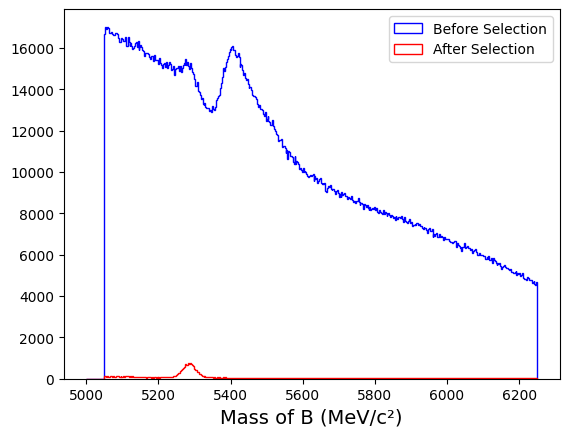

Total B Meson Entries Before Selection: 5135823
Total B Meson Entries After Selection: 34066


In [ ]:
#selection function
CutTree_MB = m_B[selection]

plt.figure()
plt.hist(m_B, bins=500, range=(5000, 6250), alpha=1, label="Before Selection", histtype="step", color='blue')
plt.hist(CutTree_MB, bins=500, range=(5000, 6250), alpha=1, label="After Selection", histtype="step", color='red')
plt.xlabel("Mass of B (MeV/c²)", fontsize=14)
plt.legend()
plt.show()

print(f"Total B Meson Entries Before Selection: {len(m_B)}")
print(f"Total B Meson Entries After Selection: {len(CutTree_MB)}")




# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

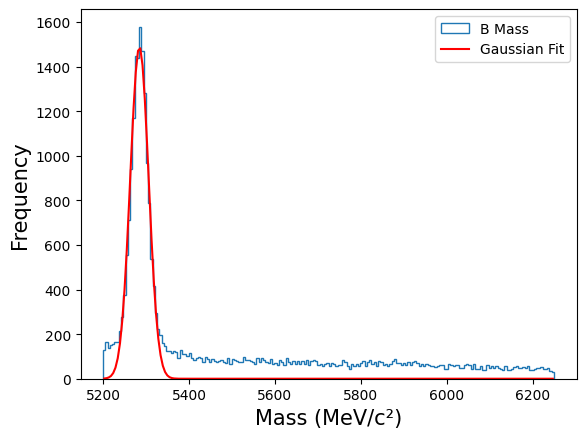

In [ ]:
from scipy.optimize import curve_fit

bin_height, bin_edge, _ = plt.hist(CutTree_MB, bins=200, range=(5200, 6250), label="B Mass", histtype="step")

#compute bin centers
xdata = (bin_edge[:-1] + bin_edge[1:]) / 2
ydata = bin_height

#gaussian function
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2. * sigma**2))

#fit Gaussian
p0 = [max(ydata), np.mean(CutTree_MB), np.std(CutTree_MB)]
optimisedParameters, pcov = curve_fit(gauss, xdata, ydata, p0=p0)

#compute fit curve
yfit = gauss(xdata, *optimisedParameters)

plt.plot(xdata, yfit, label="Gaussian Fit", color="r")
plt.xlabel("Mass (MeV/c²)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.legend()
plt.show()


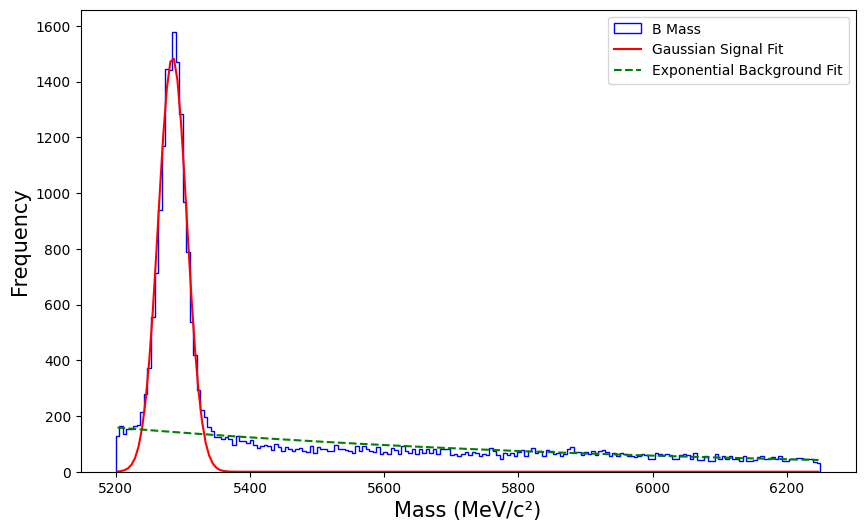

Exponential Fit Parameters: A = 115008.50, B = 0.001266


In [ ]:
#exponential
def exponential(x, A, B):
    return A * np.exp(-B * x)

#define sidebands: Choose mass ranges that exclude the peak (e.g., <5100 and >6000 MeV/c²)
sideband_mask = (xdata < 5200) | (xdata > 6000)
x_bg = xdata[sideband_mask]
y_bg = ydata[sideband_mask]

#fit exponential to background
p0_bg = [max(y_bg), 0.001]  #initial guess for parameters
opt_params_bg, _ = curve_fit(exponential, x_bg, y_bg, p0=p0_bg)

#compute fit curve for the full range
y_exp_fit = exponential(xdata, *opt_params_bg)

plt.figure(figsize=(10,6))
plt.hist(CutTree_MB, bins=200, range=(5200, 6250), label="B Mass", histtype="step", color="blue")
plt.plot(xdata, yfit, label="Gaussian Signal Fit", color="r")
plt.plot(xdata, y_exp_fit, label="Exponential Background Fit", color="g", linestyle="--")

plt.xlabel("Mass (MeV/c²)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.legend()
plt.show()

print(f"Exponential Fit Parameters: A = {opt_params_bg[0]:.2f}, B = {opt_params_bg[1]:.6f}")


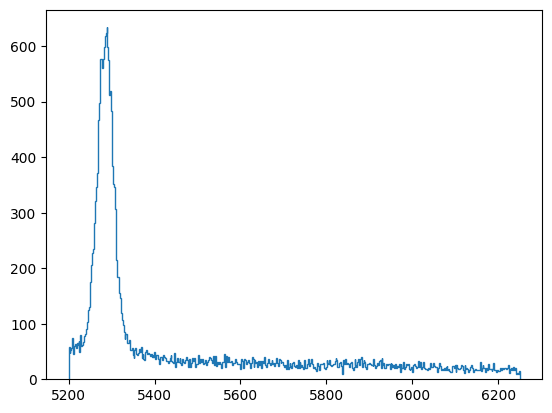

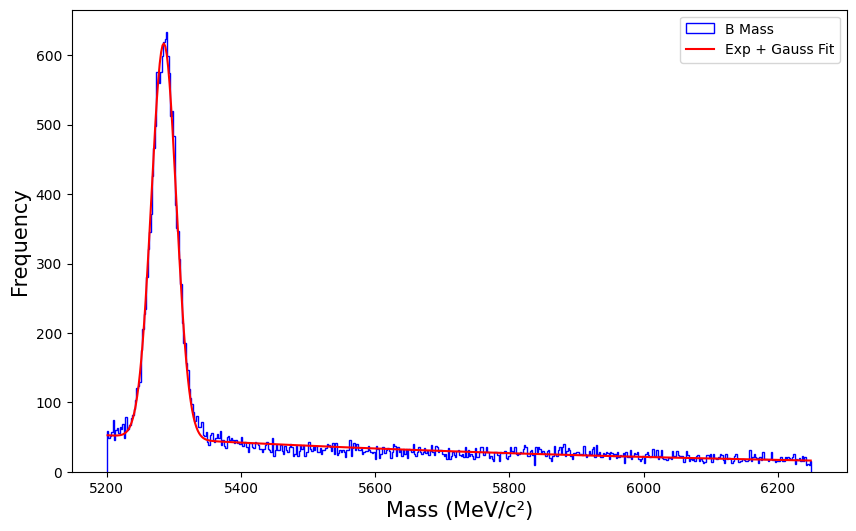

Fitted Parameters:
  Exponential Background: A = 18502.88, B = 0.001128
  Gaussian Signal: C = 569.41, mu = 5284.82, sigma = 18.62


In [ ]:

#bin_height, bin_edge, _ = plt.hist(CutTree_MB, bins=500, range=(5200, 6250), label="B Mass", histtype="step")

#compute bin centers
xdata = (bin_edge[:-1] + bin_edge[1:]) / 2
ydata = bin_height

#define combined fitting function (Exponential + Gaussian)
def exp_gauss(x, A, B, C, mu, sigma):
    return A * np.exp(-B * x) + C * np.exp(-(x - mu)**2 / (2 * sigma**2))

#initial parameter guesses
A_guess = (max(ydata))  # Background amplitude
B_guess = 0.0001  # Exponential decay rate
C_guess = max(ydata)  # Gaussian peak height
mu_guess = np.mean(CutTree_MB)  # Peak center
sigma_guess = np.std(CutTree_MB)  # Peak width

p0_combined = [A_guess, B_guess, C_guess, mu_guess, sigma_guess]

#fit the combined function
opt_params_combined, _ = curve_fit(exp_gauss, xdata, ydata, p0=p0_combined)

#compute fit curve
y_combined_fit = exp_gauss(xdata, *opt_params_combined)

plt.figure(figsize=(10,6))
plt.hist(CutTree_MB, bins=500, range=(5200, 6250), label="B Mass", histtype="step", color="blue")
plt.plot(xdata, y_combined_fit, label="Exp + Gauss Fit", color="r")

plt.xlabel("Mass (MeV/c²)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.legend()
plt.show()

A_fit, B_fit, C_fit, mu_fit, sigma_fit = opt_params_combined
print(f"Fitted Parameters:")
print(f"  Exponential Background: A = {A_fit:.2f}, B = {B_fit:.6f}")
print(f"  Gaussian Signal: C = {C_fit:.2f}, mu = {mu_fit:.2f}, sigma = {sigma_fit:.2f}")


In [ ]:
from scipy.stats import chi2

#calculate Chi-Square 
expected_counts = exp_gauss(xdata, *opt_params_combined)
chi2_value = np.sum(((ydata - expected_counts) ** 2) / expected_counts)
ndf = len(ydata) - len(opt_params_combined) - 1  # Corrected
p_value = chi2.sf(chi2_value, ndf)
reduced_chi2 = chi2_value / ndf  # Corrected reduced chi-square

print(f"Chi-Square Test:")
print(f"  χ² = {reduced_chi2:.2f}, NDF = {ndf}, p-value = {p_value:.5f}")

#signal
from math import sqrt, pi

A_fit, B_fit, C_fit, mu_fit, sigma_fit = opt_params_combined
mass_min, mass_max = 5150, 6250  # Histogram range
nbins = 500

signal_yield = ((C_fit * sigma_fit * sqrt(2 * pi)) / (mass_max - mass_min)) * nbins

#signal uncertainty
signal_uncertainty = ((np.sqrt(C_fit) * sigma_fit * sqrt(2 * pi)) / (mass_max - mass_min)) * nbins
signal_uncertainty += ((C_fit * np.sqrt(sigma_fit) * sqrt(2 * pi)) / (mass_max - mass_min)) * nbins

print(f"Signal Yield: {signal_yield:.2f} ± {signal_uncertainty:.2f}")

#background yield
background_yield = np.sum(exponential(xdata, A_fit, B_fit))

#background uncertainty
background_uncertainty = np.sqrt(np.sum(exponential(xdata, A_fit, B_fit)))

print(f"Background Yield: {background_yield:.2f} ± {background_uncertainty:.2f}")


Chi-Square Test:
  χ² = 1.33, NDF = 494, p-value = 0.00000
Signal Yield: 12076.94 ± 3305.24
Background Yield: 15400.97 ± 124.10


The reduced chi squared is still higher than 1 and the p-value is virtually 0 meaning the fit parameters or the fit function is not fitting. So maybe writing an algorithm that would optimize these parameters or trying to find a better combination of functions to fit the curve. 

Expected counts: min = 20.98, max = 732.04
Observed/Expected Ratio: min = 0.00, max = 2.07


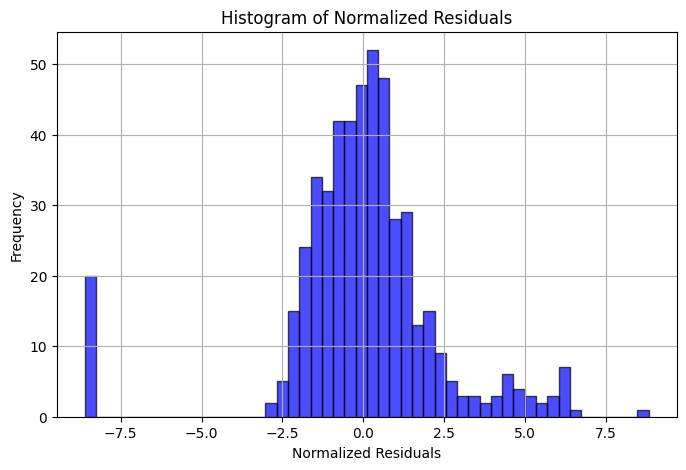

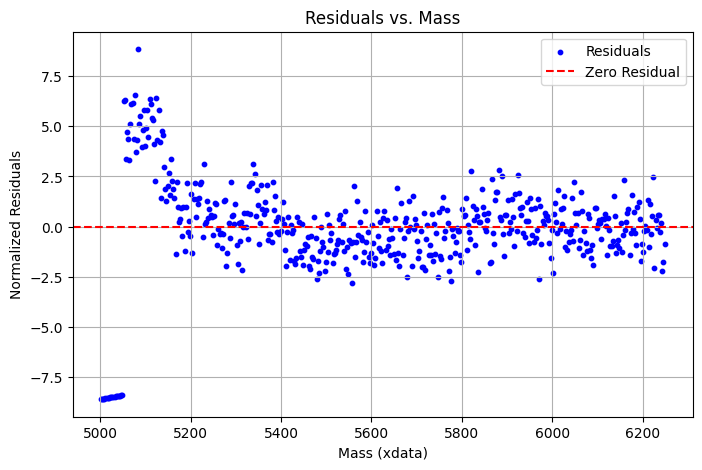

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Check expected counts range
print(f"Expected counts: min = {np.min(expected_counts):.2f}, max = {np.max(expected_counts):.2f}")

# Check observed-to-expected ratio
ratio = ydata / expected_counts
print(f"Observed/Expected Ratio: min = {np.min(ratio):.2f}, max = {np.max(ratio):.2f}")

# Compute residuals
residuals = (ydata - expected_counts) / np.sqrt(expected_counts)

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.xlabel("Normalized Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Normalized Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(xdata, residuals, color='b', s=10, label="Residuals")
plt.axhline(0, color='r', linestyle='--', label="Zero Residual")
plt.xlabel("Mass (xdata)")
plt.ylabel("Normalized Residuals")
plt.title("Residuals vs. Mass")
plt.legend()
plt.grid(True)
plt.show()


Sharp Outliers below 5150:
The cluster of extreme negative residuals around 5000 suggests the model strongly overestimates in that region. An incorrectly modeled background shape (exponential might not be the best as previously mentioned). Anomalous data points (e.g., binning issues or statistical fluctuations). Removed all data below 5200 for safe measures.

Below I tried to attempt the other fits but not many of them worked so I just left them here for future purposes if I ever wanted to return to he problem.

/var/folders/yv/bfqzsln933lc8w1bfv3n92tc0000gn/T/ipykernel_45437/88368053.py:33: RuntimeWarning: invalid value encountered in power
  A * a / safe_b_t ** n
/var/folders/yv/bfqzsln933lc8w1bfv3n92tc0000gn/T/ipykernel_45437/88368053.py:24: RuntimeWarning: invalid value encountered in scalar power
  a = (n / abs_alpha) ** n * np.exp(-0.5 * abs_alpha ** 2)
/var/folders/yv/bfqzsln933lc8w1bfv3n92tc0000gn/T/ipykernel_45437/88368053.py:24: RuntimeWarning: overflow encountered in scalar power
  a = (n / abs_alpha) ** n * np.exp(-0.5 * abs_alpha ** 2)
/var/folders/yv/bfqzsln933lc8w1bfv3n92tc0000gn/T/ipykernel_45437/88368053.py:24: RuntimeWarning: invalid value encountered in scalar multiply
  a = (n / abs_alpha) ** n * np.exp(-0.5 * abs_alpha ** 2)
/var/folders/yv/bfqzsln933lc8w1bfv3n92tc0000gn/T/ipykernel_45437/88368053.py:80: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(model, xdata, ydata, p0=p0, maxfev=10000)


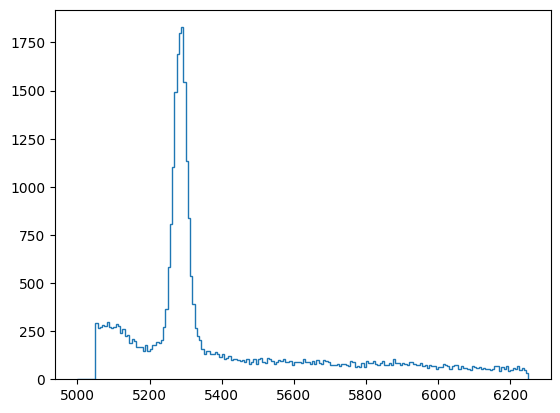

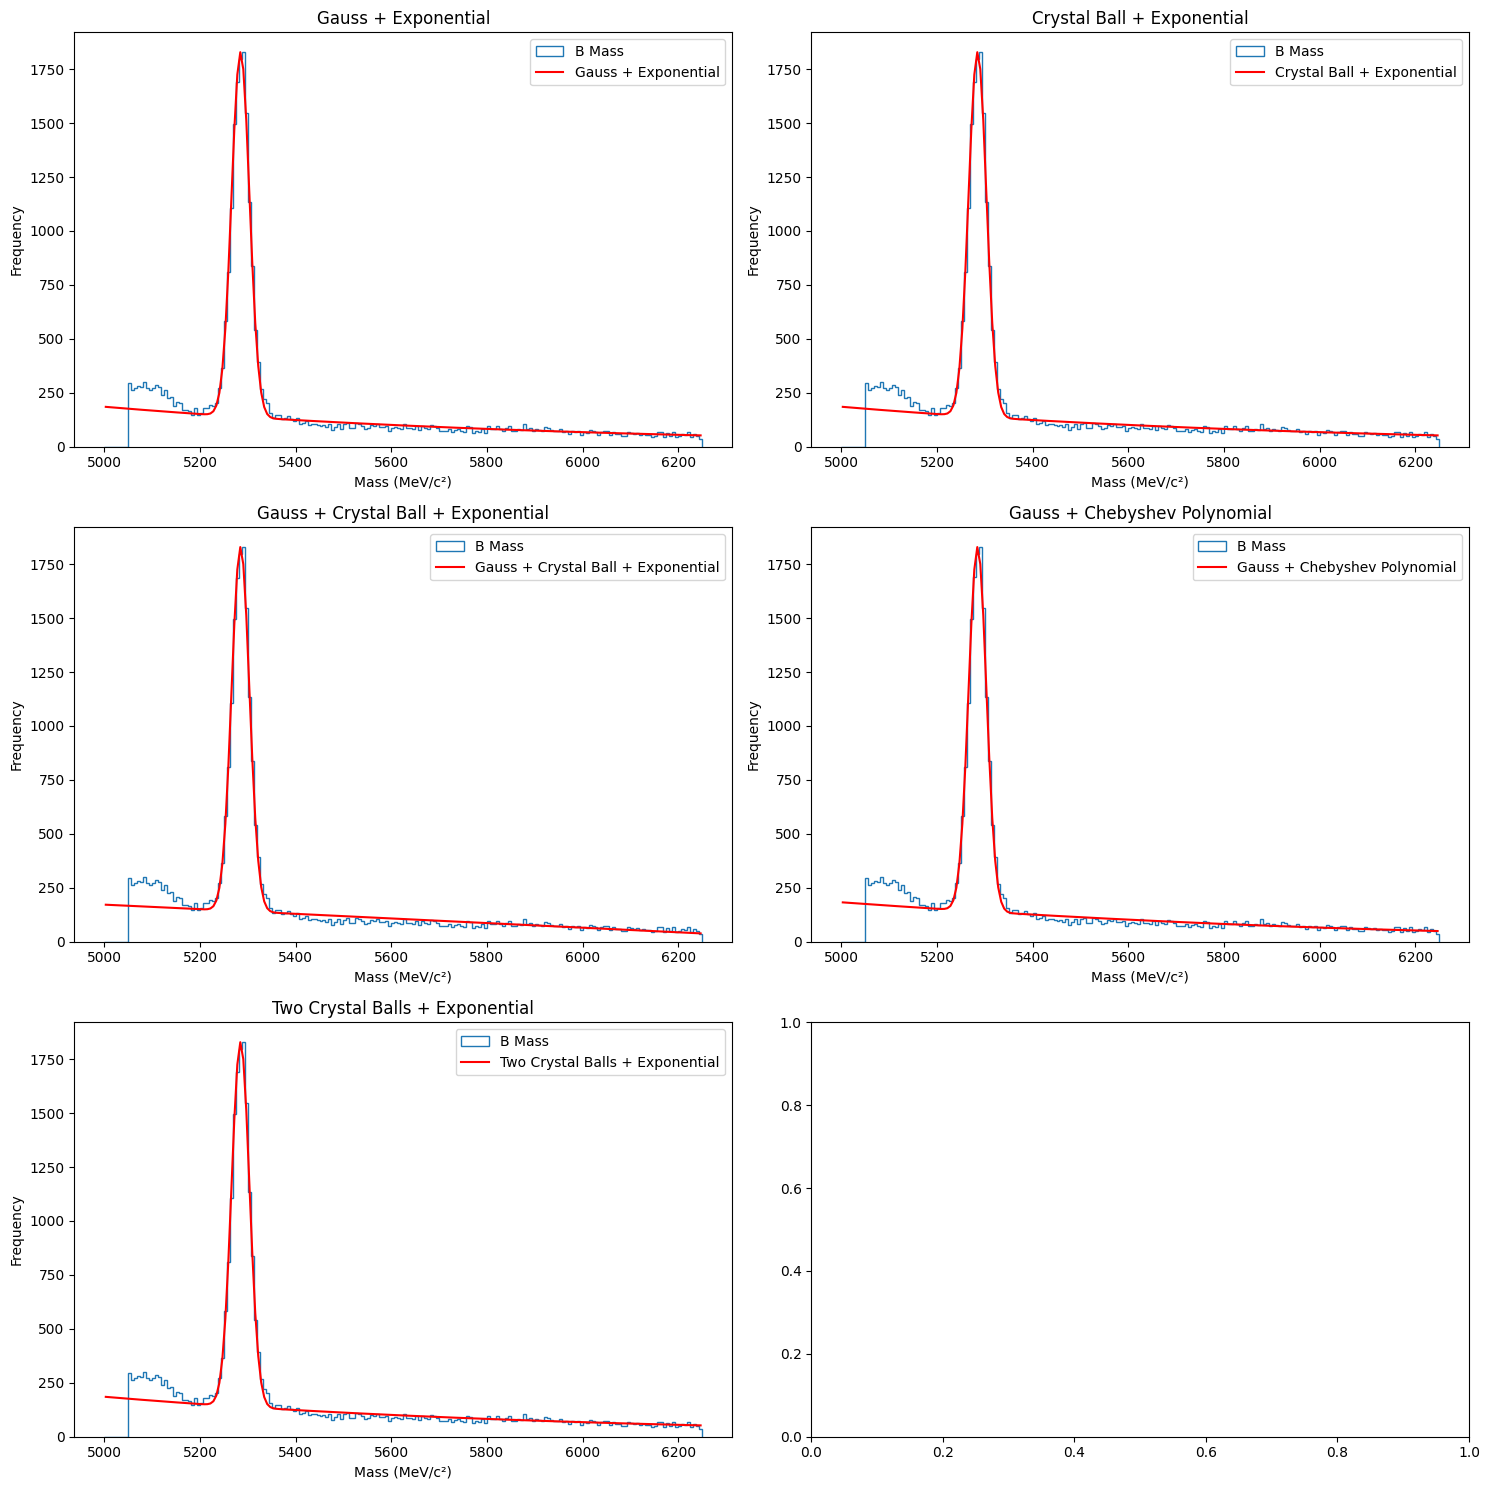

In [ ]:
from scipy.special import erfc
from numpy.polynomial.chebyshev import chebval

#assuming CutTree_MB is already defined somewhere
bin_height, bin_edge, _ = plt.hist(CutTree_MB, bins=200, range=(5000, 6250), label="B Mass", histtype='step')

xdata = (bin_edge[:-1] + bin_edge[1:]) / 2
ydata = bin_height

def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2. * sigma ** 2))

def exponential(x, a, b):
    return a * np.exp(-b * x)

def crystal_ball(x, A, mu, sigma, alpha, n):
    t = (x - mu) / sigma
    abs_alpha = np.abs(alpha)
    a = (n / abs_alpha) ** n * np.exp(-0.5 * abs_alpha ** 2)


    b = n / abs_alpha - abs_alpha
    safe_b_t = np.where(b - t == 0, 1e-6, b - t) 

    return np.where(
        t > -alpha,
        A * np.exp(-0.5 * t ** 2),
        A * a / safe_b_t ** n
    )


def chebyshev(x, c0, c1, c2):
    return chebval(x, [c0, c1, c2])

def model1(x, a, b, A, mu, sigma):  # Gauss + Exponential
    return exponential(x, a, b) + gauss(x, A, mu, sigma)

def model2(x, a, b, A, mu, sigma, alpha, n):  # Crystal Ball + Exponential
    return exponential(x, a, b) + crystal_ball(x, A, mu, sigma, alpha, n)

def model3(x, a, b, A1, mu1, sigma1, alpha, n, A2, mu2, sigma2):  # Gauss + Crystal Ball + Exponential
    return exponential(x, a, b) + gauss(x, A1, mu1, sigma1) + crystal_ball(x, A2, mu2, sigma2, alpha, n)

def model4(x, c0, c1, c2, A, mu, sigma):  # Gauss + Chebyshev Polynomial
    return chebyshev(x, c0, c1, c2) + gauss(x, A, mu, sigma)

def model5(x, a, b, A1, mu1, sigma1, alpha1, n1, A2, mu2, sigma2, alpha2, n2):  # Two Crystal Balls + Exponential
    return exponential(x, a, b) + crystal_ball(x, A1, mu1, sigma1, alpha1, n1) + crystal_ball(x, A2, mu2, sigma2, alpha2, n2)


initial_guesses = {
    "model1": [1000, -2e-3, 5000, 5280, 15],  # Slightly broader Gaussian
    "model2": [500, -1.5e-3, 3000, 5280, 15, 2.0, 5],  # Increase n
    "model3": [1000, -1.5e-3, 5000, 5280, 15, 2.0, 5, 3000, 5280, 15],  # Reduce `n` to control tail
    "model4": [2, -0.002, 0.0001, 3000, 5280, 15],  # More flexibility for Chebyshev
    "model5": [500, -1.5e-3, 3000, 5280, 15, 2, 5, 3000, 5300, 15, 2, 5],  # Reduce tail exponent, shift second peak slightly
}


models = {
    "Gauss + Exponential": (model1, initial_guesses["model1"]),
    "Crystal Ball + Exponential": (model2, initial_guesses["model2"]),
    "Gauss + Crystal Ball + Exponential": (model3, initial_guesses["model3"]),
    "Gauss + Chebyshev Polynomial": (model4, initial_guesses["model4"]),
    "Two Crystal Balls + Exponential": (model5, initial_guesses["model5"]),
}


fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (name, (model, p0)) in enumerate(models.items()):
    try:
        popt, pcov = curve_fit(model, xdata, ydata, p0=p0, maxfev=10000)
        yfit = model(xdata, *popt)

        axes[i].hist(CutTree_MB, bins=200, range=(5000, 6250), label="B Mass", histtype='step')
        axes[i].plot(xdata, yfit, label=name, color='red')
        axes[i].set_title(name)
        axes[i].set_xlabel("Mass (MeV/c²)")
        axes[i].set_ylabel("Frequency")
        axes[i].legend()
    except RuntimeError:
        axes[i].set_title(f"Fit failed for {name}")
        print(f"Fit failed for {name}")

plt.tight_layout()
plt.show()


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [ ]:

def crystal_ball(x, A, mu, sigma, alpha, n):
    t = (x - mu) / sigma
    abs_alpha = np.abs(alpha)
    

    safe_n = np.maximum(n, 1e-6)  
    safe_alpha = np.maximum(abs_alpha, 1e-6) 

    a = (safe_n / safe_alpha) ** safe_n * np.exp(-0.5 * safe_alpha ** 2)
    b = safe_n / safe_alpha - safe_alpha
    safe_b_t = np.maximum(b - t, 1e-6) 
    
    return np.where(
        t > -safe_alpha,
        A * np.exp(-0.5 * t ** 2),
        A * a / safe_b_t ** safe_n
    )
bounds = {
    "model1": ([0, -np.inf, 4000, 5200, 5], [np.inf, 0, 10000, 5300, 50]),  # Gauss + Exponential
    "model2": ([0, -np.inf, 0, 5200, 5, 0.1, 1], [np.inf, 0, np.inf, 5300, 50, 10, 20]),  # Crystal Ball + Exp
    "model3": ([0, -np.inf, 0, 5200, 5, 0.1, 1, 0, 5200, 5], [np.inf, 0, np.inf, 5300, 50, 10, 20, np.inf, 5300, 50]),  # Gauss + CB + Exp
    "model4": ([-np.inf, -np.inf, -np.inf, 0, 5200, 5], [np.inf, np.inf, np.inf, np.inf, 5300, 50]),  # Gauss + Chebyshev
    "model5": ([0, -np.inf, 0, 5200, 5, 0.1, 1, 0, 5200, 5, 0.1, 1], [np.inf, 0, np.inf, 5300, 50, 10, 20, np.inf, 5300, 50, 10, 20])  # Two CB + Exp
}


results = {}

for name, (model, p0) in models.items():
    try:

        if name in bounds:
            popt, pcov = curve_fit(model, xdata, ydata, p0=p0, maxfev=10000, bounds=bounds[name])
        else:
            popt, pcov = curve_fit(model, xdata, ydata, p0=p0, maxfev=10000)

        perr = np.sqrt(np.diag(pcov))


        yfit = model(xdata, *popt)

        errors = np.sqrt(ydata)
        errors[errors == 0] = 1

        dof = len(ydata) - len(popt)
        chi2_red = np.sum(((ydata - yfit) / errors) ** 2) / dof

        if "Gauss" in name:
            A, mu, sigma = popt[-3:]
            dA, dmu, dsigma = perr[-3:]

        elif "Crystal Ball" in name:
            A, mu, sigma, alpha, n = popt[-5:]
            dA, dmu, dsigma, dalpha, dn = perr[-5:]

        else:
            continue 


        signal_yield, signal_error = compute_signal_yield(A, sigma, dA, dsigma, min_bin, max_bin, nbin)

        results[name] = {
            "Signal Yield": (signal_yield, signal_error),
            "Reduced Chi²": chi2_red
        }

    except RuntimeError:
        print(f"Fit failed for {name}")

for name, res in results.items():
    print(f"\n{name}:")
    print(f"  Signal Yield: {res['Signal Yield'][0]:.2f} ± {res['Signal Yield'][1]:.2f}")
    print(f"  Reduced Chi²: {res['Reduced Chi²']:.3f}")



Gauss + Exponential:
  Signal Yield: 12705.77 ± 305.20
  Reduced Chi²: 1344.846

Crystal Ball + Exponential:
  Signal Yield: 13040.77 ± inf
  Reduced Chi²: 1410.887

Gauss + Crystal Ball + Exponential:
  Signal Yield: -14581191347.80 ± -inf
  Reduced Chi²: 1380.236

Gauss + Chebyshev Polynomial:
  Signal Yield: 12675.53 ± 305.38
  Reduced Chi²: 1324.254

Two Crystal Balls + Exponential:
  Signal Yield: -6436.96 ± -inf
  Reduced Chi²: 1410.897


/var/folders/yv/bfqzsln933lc8w1bfv3n92tc0000gn/T/ipykernel_45437/4173297913.py:38: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(model, xdata, ydata, p0=p0, maxfev=10000)


# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [147]:
H1_Charge=events['H1_Charge'].array()
H2_Charge=events['H2_Charge'].array()
H3_Charge=events['H3_Charge'].array()
print(len(H1_Charge), len(H2_Charge), len(H3_Charge), len(CutTree_MB))


5135823 5135823 5135823 34066


check for lengths of arrays

In [160]:

def classify_b_mesons(branches, selection):
    # Extract charge information
    H1_charge = branches['H1_Charge'][selection]
    H2_charge = branches['H2_Charge'][selection]
    H3_charge = branches['H3_Charge'][selection]
    
    # Identify B+ and B- based on charge pattern
    B_plus_mask = ((H1_charge == +1) & (H2_charge == +1) & (H3_charge == -1)) | \
                  ((H1_charge == +1) & (H2_charge == -1) & (H3_charge == +1)) | \
                  ((H1_charge == -1) & (H2_charge == +1) & (H3_charge == +1))

    B_minus_mask = ((H1_charge == -1) & (H2_charge == -1) & (H3_charge == +1)) | \
                   ((H1_charge == -1) & (H2_charge == +1) & (H3_charge == -1)) | \
                   ((H1_charge == +1) & (H2_charge == -1) & (H3_charge == -1))

    return B_plus_mask, B_minus_mask





def calculate_asymmetry(N_B_plus, N_B_minus):
    if (N_B_minus + N_B_plus) > 0:
        A = (N_B_minus - N_B_plus) / (N_B_minus + N_B_plus)
        sigma_A = np.sqrt((1 - A**2) / (N_B_minus + N_B_plus))
    else:
        A, sigma_A = np.nan, np.nan  # Avoid division by zero

    return A, sigma_A

# Example usage
B_plus_mask, B_minus_mask = classify_b_mesons(branches, selection)
N_B_plus = np.sum(B_plus_mask)
N_B_minus = np.sum(B_minus_mask)

asymmetry, uncertainty = calculate_asymmetry(N_B_plus, N_B_minus)

# Print results
print(f"Asymmetry: {asymmetry:.5f} ± {uncertainty:.5f}")
print(f"N_B_plus: {N_B_plus}, N_B_minus: {N_B_minus}")
print(f"Total events after filtering: {N_B_plus + N_B_minus}")
# Count occurrences of each sum of charges



Asymmetry: -0.03493 ± 0.00541
N_B_plus: 17628, N_B_minus: 16438
Total events after filtering: 34066


Around 3.5% more B_plus particles being produced with a 0.5% uncertainty. The uncertainty of 0.5% indicates that the 3.5% difference is measured with a relatively small level of confidence. This uncertainty might mean that while the asymmetry exists, it could be within a margin of error, and further measurements would be needed to confirm its statistical significance. If the uncertainty were larger, the asymmetry might be less meaningful or harder to interpret.

OK now lets do that for the Magnet up file. Please reset kernel, if you dont it will not work for some reason.

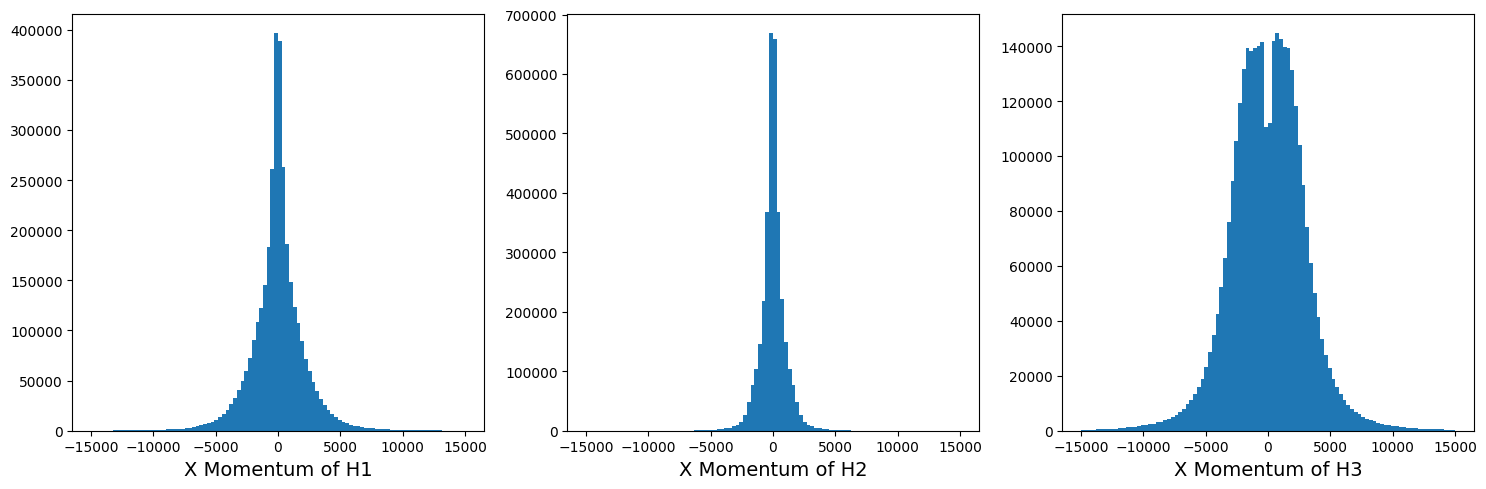

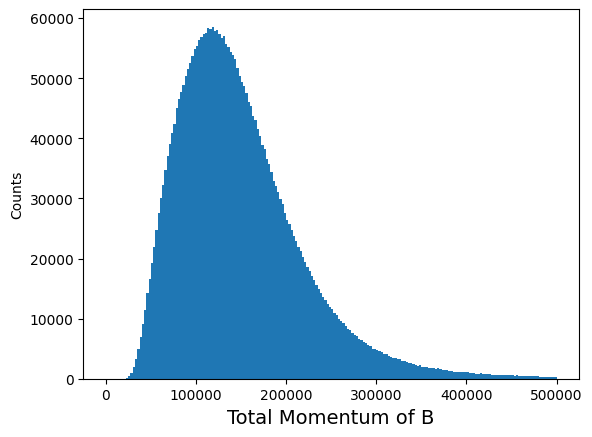

In [ ]:
import os
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

#ensure directory exists
os.makedirs("LHCb_Data", exist_ok=True)

file_path = "LHCb_Data/B2HHH_MagnetUp.root"

if os.path.exists(file_path):
    f = uproot.open(file_path)
    #print(f.keys())

    # Inspect tree structure
    #print(f["DecayTree"].show())
    #print(f["DecayTree"].keys())
else:
    raise RuntimeError(f"Error: File {file_path} not found.")

def safe_load(var):
    try:
        return f["DecayTree"][var].array()
    except KeyError:
        print(f"Error: {var} not found in DecayTree")
        return None

H1_PX = safe_load("H1_PX")
H1_PY = safe_load("H1_PY")
H1_PZ = safe_load("H1_PZ")

H2_PX = safe_load("H2_PX")
H2_PY = safe_load("H2_PY")
H2_PZ = safe_load("H2_PZ")

H3_PX = safe_load("H3_PX")
H3_PY = safe_load("H3_PY")
H3_PZ = safe_load("H3_PZ")


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, data, label in zip(axes, [H1_PX, H2_PX, H3_PX], ["H1", "H2", "H3"]):
    if data is not None:  # Prevents errors if any dataset is missing
        ax.hist(data, bins=100, range=(-15000, 15000))
        ax.set_xlabel(f"X Momentum of {label}", fontsize=14)

plt.tight_layout()
plt.show()

# Compute total momentum of the B meson
B_Ptot = np.sqrt((H1_PX + H2_PX + H3_PX)**2 + 
                 (H1_PY + H2_PY + H3_PY)**2 + 
                 (H1_PZ + H2_PZ + H3_PZ)**2)

# Plot histogram for B meson
plt.figure()
plt.hist(B_Ptot, bins=200, range=(0, 500000))
plt.xlabel("Total Momentum of B", fontsize=14)
plt.ylabel("Counts")
plt.show()

# Load all branches into a dictionary
events = f["DecayTree"]
#branches_dict = ak.to_list(events.arrays())

# Pretty print event #45
# event_idx = 45
# if event_idx < len(branches_dict):
#     event_data = branches_dict[event_idx]
#     print(f"Event number #{event_idx}")
#     print("-------------------")
#     for branch, value in event_data.items():
#         print(f"{branch}: {value}")
# else:
#     print(f"Error: Event {event_idx} is out of range!")


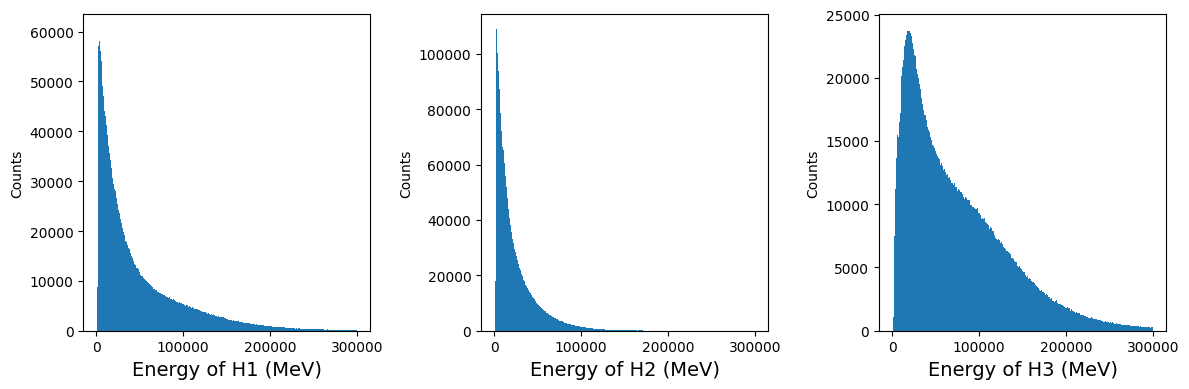

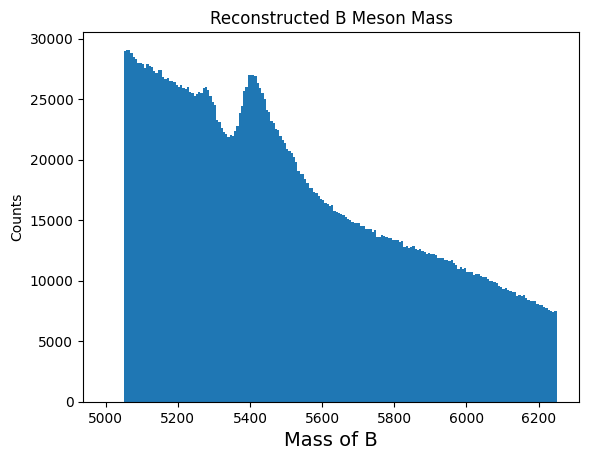

Number of selected events: 53838


In [ ]:
total_momentum = {
    p: np.sqrt(locals()[f"{p}_PX"]**2 + locals()[f"{p}_PY"]**2 + locals()[f"{p}_PZ"]**2)
    for p in ["H1", "H2", "H3"]
}
m_K = 493.7

E = {p: np.sqrt(total_momentum[p]**2 + m_K**2) for p in ["H1", "H2", "H3"]}


plt.figure(figsize=(12, 4))
for i, (p, energy) in enumerate(E.items(), 1):
    plt.subplot(1, 3, i)
    plt.hist(energy, bins=500, range=(0, 300000))
    plt.xlabel(f"Energy of {p} (MeV)", fontsize=14)
    plt.ylabel("Counts")
plt.tight_layout()
plt.show()


E_B = sum(E.values())
B_Ptot = np.sqrt(
    (H1_PX + H2_PX + H3_PX)**2 + 
    (H1_PY + H2_PY + H3_PY)**2 + 
    (H1_PZ + H2_PZ + H3_PZ)**2
)
m_B = np.sqrt(E_B**2 - B_Ptot**2)


plt.figure()
plt.hist(m_B, bins=200, range=(5000, 6250))
plt.xlabel("Mass of B", fontsize=14)
plt.ylabel("Counts")
plt.title("Reconstructed B Meson Mass")
plt.show()

prob_vars = ["ProbK", "ProbPi"]
prob_data = {var: {p: f["DecayTree"][f"{p}_{var}"].array() for p in ["H1", "H2", "H3"]} for var in prob_vars}

colors = ["red", "pink", "yellow"]

# Plot ProbK and ProbPi
# for var in prob_vars:
#     plt.figure(figsize=(10, 6))
#     for p, color in zip(["H1", "H2", "H3"], colors):
#         plt.hist(prob_data[var][p], bins=200, range=(0, 1), color=color, alpha=0.5, label=f"{p}_{var}")
#     plt.xlabel(f"{var}", fontsize=14)
#     plt.ylabel("Frequency")
#     plt.title(f"Histogram of {var} for H1, H2, and H3", fontsize=16)
#     plt.legend()
#     plt.show()

# # Load and plot B_VertexChi2
# B_VertexChi2 = f["DecayTree"]["B_VertexChi2"].array()
# plt.figure(figsize=(10, 6))
# plt.hist(B_VertexChi2, bins=200, range=(0, 12.5), color="blue", alpha=0.5)
# plt.xlabel("B_VertexChi2", fontsize=14)
# plt.ylabel("Frequency")
# plt.title("B Vertex Chi-Squared Distribution", fontsize=16)
# plt.show()

branches = f["DecayTree"].arrays()

selection = (
    (branches["H1_ProbK"] > 0.1) &
    (branches["H2_ProbK"] > 0.1) &
    (branches["H3_ProbK"] > 0.1) &
    (branches["H1_isMuon"] != 1) &
    (branches["H2_isMuon"] != 1) &
    (branches["H3_isMuon"] != 1) &
    (branches["B_VertexChi2"] > 0) &
    (branches["B_VertexChi2"] < 5)
)

CutTree_H2_PX = branches['H2_PX'][selection]

print(f"Number of selected events: {len(CutTree_H2_PX)}")

# # Create figure with two subplots for H2_PX before and after selection
# fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# # Histogram before selection
# ax[0].hist(branches['H2_PX'], bins=100, range=(0, 10000), color='blue', alpha=0.7, edgecolor='black')
# ax[0].set_xlabel("H2 Px (MeV/c)", fontsize=14)
# ax[0].set_ylabel("Counts", fontsize=14)
# ax[0].set_title("Before Selection")
# ax[0].grid(True, linestyle="--", alpha=0.6)

# # Histogram after selection (adjust y-limit)
# ax[1].hist(CutTree_H2_PX, bins=100, range=(0, 10000), color='red', alpha=0.7, edgecolor='black')
# ax[1].set_xlabel("H2 Px (MeV/c)", fontsize=14)
# ax[1].set_title("After Selection")
# ax[1].grid(True, linestyle="--", alpha=0.6)

# # Adjust y-limits separately to optimize visibility
# ax[0].set_ylim(0, max(np.histogram(branches['H2_PX'], bins=100, range=(0, 10000))[0]) * 1.1)
# ax[1].set_ylim(0, max(np.histogram(CutTree_H2_PX, bins=100, range=(0, 10000))[0]) * 1.1)

# # Adjust layout and show plots
# plt.tight_layout()
# plt.show()


For this file the selection was much tighter than the magnet down file using the same parameters, hence it was slightly edited which can be seen on the number of selected events.

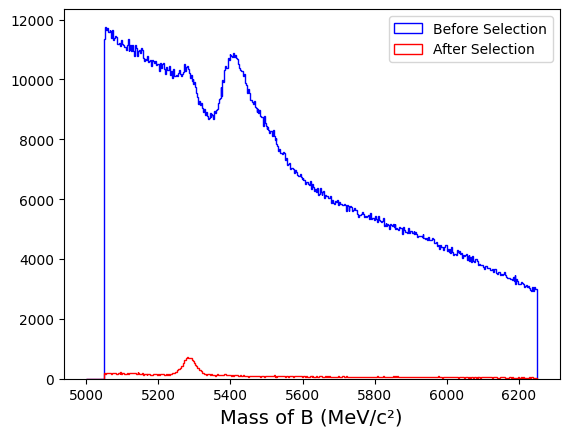

Total B Meson Entries Before Selection: 3420295
Total B Meson Entries After Selection: 53838


In [ ]:
CutTree_MB = m_B[selection]

plt.figure()
plt.hist(m_B, bins=500, range=(5000, 6250), alpha=1, label="Before Selection", histtype="step", color='blue')
plt.hist(CutTree_MB, bins=500, range=(5000, 6250), alpha=1, label="After Selection", histtype="step", color='red')
plt.xlabel("Mass of B (MeV/c²)", fontsize=14)
plt.legend()
plt.show()

print(f"Total B Meson Entries Before Selection: {len(m_B)}")
print(f"Total B Meson Entries After Selection: {len(CutTree_MB)}")




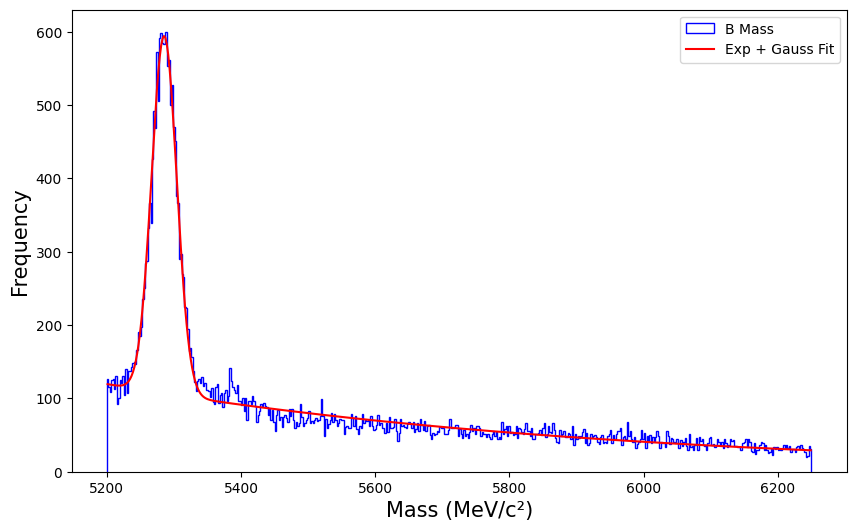

Fitted Parameters:
  Exponential Background: A = 129044.91, B = 0.001343
  Gaussian Signal: C = 487.59, mu = 5285.37, sigma = 18.75


In [ ]:
from scipy.optimize import curve_fit
#bin_height, bin_edge, _ = plt.hist(CutTree_MB, bins=500, range=(5200, 6250), label="B Mass", histtype="step")


xdata = (bin_edge[:-1] + bin_edge[1:]) / 2
ydata = bin_height

def exp_gauss(x, A, B, C, mu, sigma):
    return A * np.exp(-B * x) + C * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Initial parameter guesses
A_guess = (max(ydata))  # Background amplitude
B_guess = 0.0001  # Exponential decay rate
C_guess = max(ydata)  # Gaussian peak height
mu_guess = np.mean(CutTree_MB)  # Peak center
sigma_guess = np.std(CutTree_MB)  # Peak width

p0_combined = [A_guess, B_guess, C_guess, mu_guess, sigma_guess]

opt_params_combined, _ = curve_fit(exp_gauss, xdata, ydata, p0=p0_combined)

y_combined_fit = exp_gauss(xdata, *opt_params_combined)


plt.figure(figsize=(10,6))
plt.hist(CutTree_MB, bins=500, range=(5200, 6250), label="B Mass", histtype="step", color="blue")
plt.plot(xdata, y_combined_fit, label="Exp + Gauss Fit", color="r")

plt.xlabel("Mass (MeV/c²)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.legend()
plt.show()

A_fit, B_fit, C_fit, mu_fit, sigma_fit = opt_params_combined
print(f"Fitted Parameters:")
print(f"  Exponential Background: A = {A_fit:.2f}, B = {B_fit:.6f}")
print(f"  Gaussian Signal: C = {C_fit:.2f}, mu = {mu_fit:.2f}, sigma = {sigma_fit:.2f}")


In [ ]:

def classify_b_mesons(branches, selection):

    H1_charge = branches['H1_Charge'][selection]
    H2_charge = branches['H2_Charge'][selection]
    H3_charge = branches['H3_Charge'][selection]
    
    B_plus_mask = ((H1_charge == +1) & (H2_charge == +1) & (H3_charge == -1)) | \
                  ((H1_charge == +1) & (H2_charge == -1) & (H3_charge == +1)) | \
                  ((H1_charge == -1) & (H2_charge == +1) & (H3_charge == +1))

    B_minus_mask = ((H1_charge == -1) & (H2_charge == -1) & (H3_charge == +1)) | \
                   ((H1_charge == -1) & (H2_charge == +1) & (H3_charge == -1)) | \
                   ((H1_charge == +1) & (H2_charge == -1) & (H3_charge == -1))

    return B_plus_mask, B_minus_mask

def calculate_asymmetry(N_B_plus, N_B_minus):
    if (N_B_minus + N_B_plus) > 0:
        A = (N_B_minus - N_B_plus) / (N_B_minus + N_B_plus)
        sigma_A = np.sqrt((1 - A**2) / (N_B_minus + N_B_plus))
    else:
        A, sigma_A = np.nan, np.nan  # Avoid division by zero

    return A, sigma_A

B_plus_mask, B_minus_mask = classify_b_mesons(branches, selection)
N_B_plus = np.sum(B_plus_mask)
N_B_minus = np.sum(B_minus_mask)

asymmetry, uncertainty = calculate_asymmetry(N_B_plus, N_B_minus)

print(f"Asymmetry: {asymmetry:.5f} ± {uncertainty:.5f}")
print(f"N_B_plus: {N_B_plus}, N_B_minus: {N_B_minus}")
print(f"Total events after filtering: {N_B_plus + N_B_minus}")



Asymmetry: -0.03485 ± 0.00431
N_B_plus: 27857, N_B_minus: 25981
Total events after filtering: 53838


Smaller uncertainty and slightly smaller assymetry but very negligent difference.

But overall from this data analysis of this Cern experiment om Beta particle decay, we can see that there is a certain particle production assymetry. The significance is still on the lower end so more data would have to be analysed. Also maybe in the future better selection parameters should be chosen. Maybe with the help of the monte carlo algorithm that we looked at in week 2 we could optimize these.

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)